In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [3]:
dataset=pd.read_csv("mall.csv")

In [5]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
dataset.shape

(200, 5)

In [9]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
plt.style.use('fivethirtyeight')

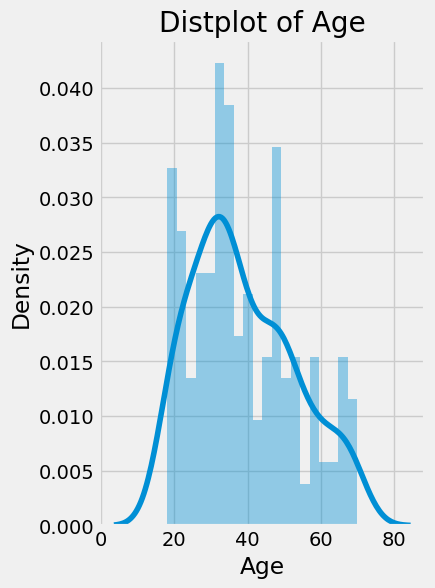

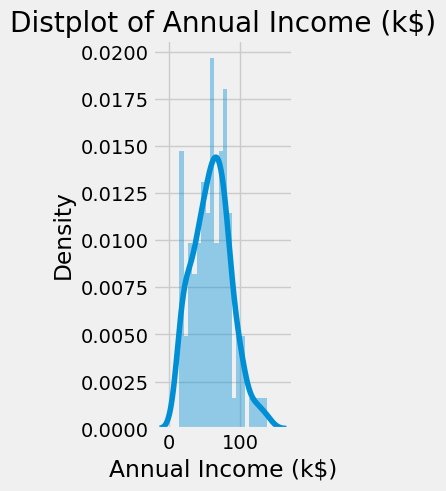

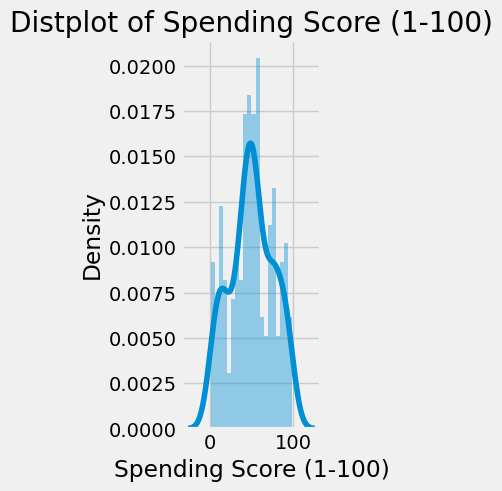

In [17]:
plt.figure(1,figsize=( 15 ,6))
n=0
for x in['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5,wspace=0.5)
    sns.distplot(dataset[x],bins=20)
    plt.title('Distplot of {}'.format(x))
    plt.show()

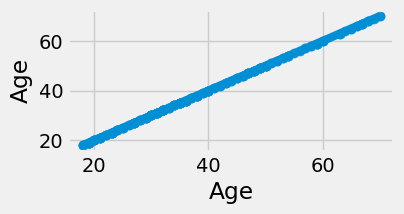

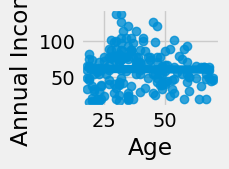

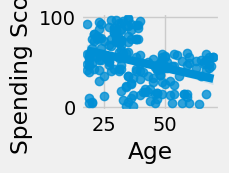

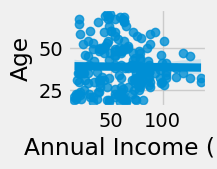

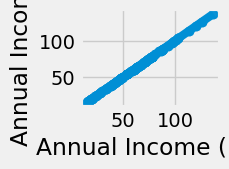

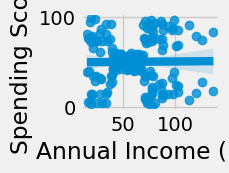

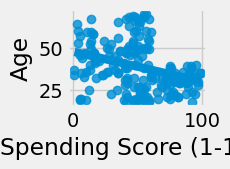

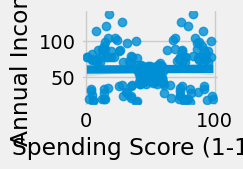

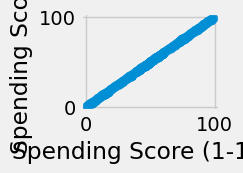

In [19]:
plt.figure(1,figsize=(15,7))
n=0
for x in['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    for y in['Age','Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace =0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1]if len(y.split())>1 else y)
        plt.show()

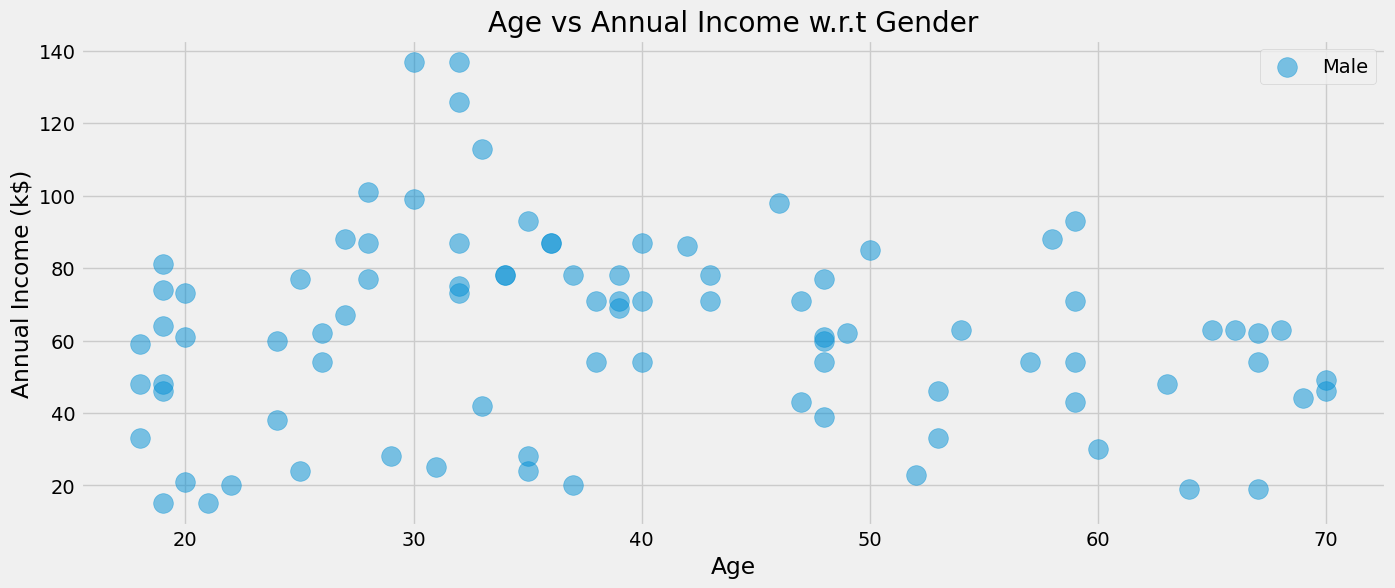

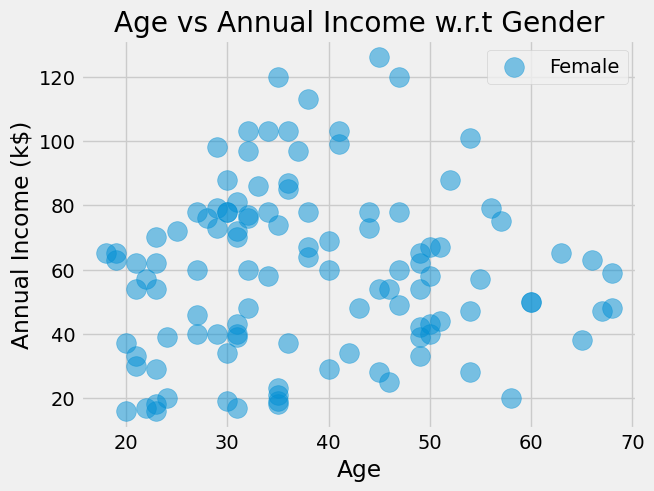

In [21]:
plt.figure(1,figsize=(15,6))
for gender in ['Male','Female']:
    plt.scatter(x='Age', y= 'Annual Income (k$)',data=dataset[dataset['Gender']==gender],
                s=200 ,alpha =0.5 ,label=gender)
    plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
    plt.title ('Age vs Annual Income w.r.t Gender')
    plt.legend()
    plt.show()

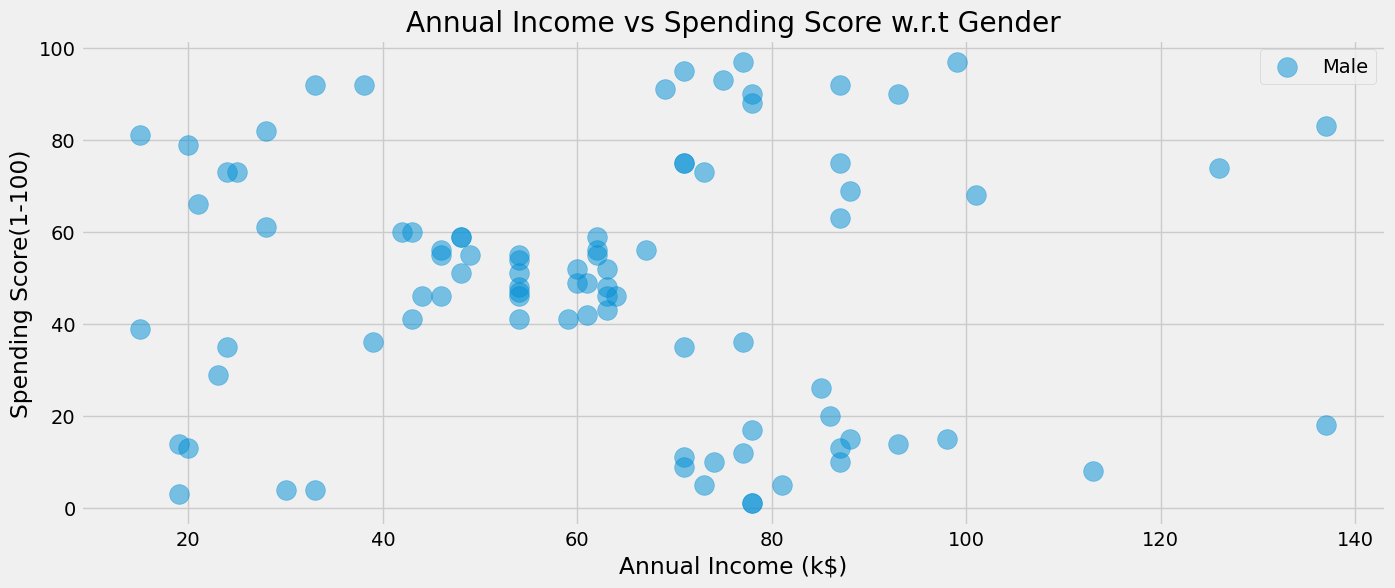

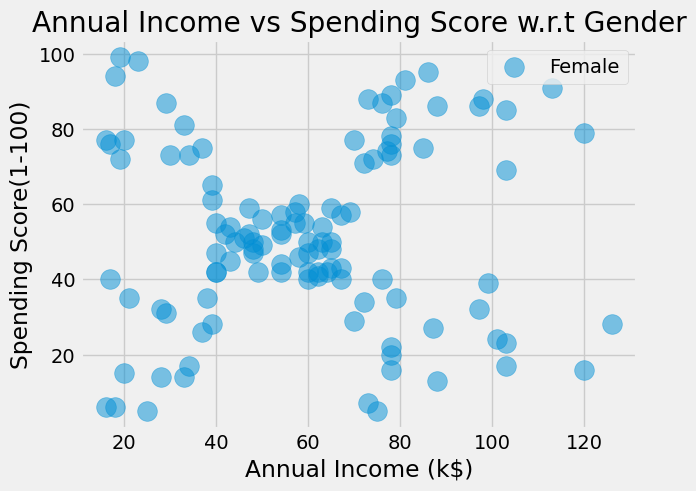

In [23]:
plt.figure(1,figsize=(15,6))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)', y= 'Spending Score (1-100)',data=dataset[dataset['Gender']==gender],
                s=200 ,alpha =0.5 ,label=gender)
    plt.xlabel('Annual Income (k$)'),plt.ylabel( 'Spending Score(1-100)')
    plt.title ('Annual Income vs Spending Score w.r.t Gender')
    plt.legend()
    plt.show()

In [27]:
X1 = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111)
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

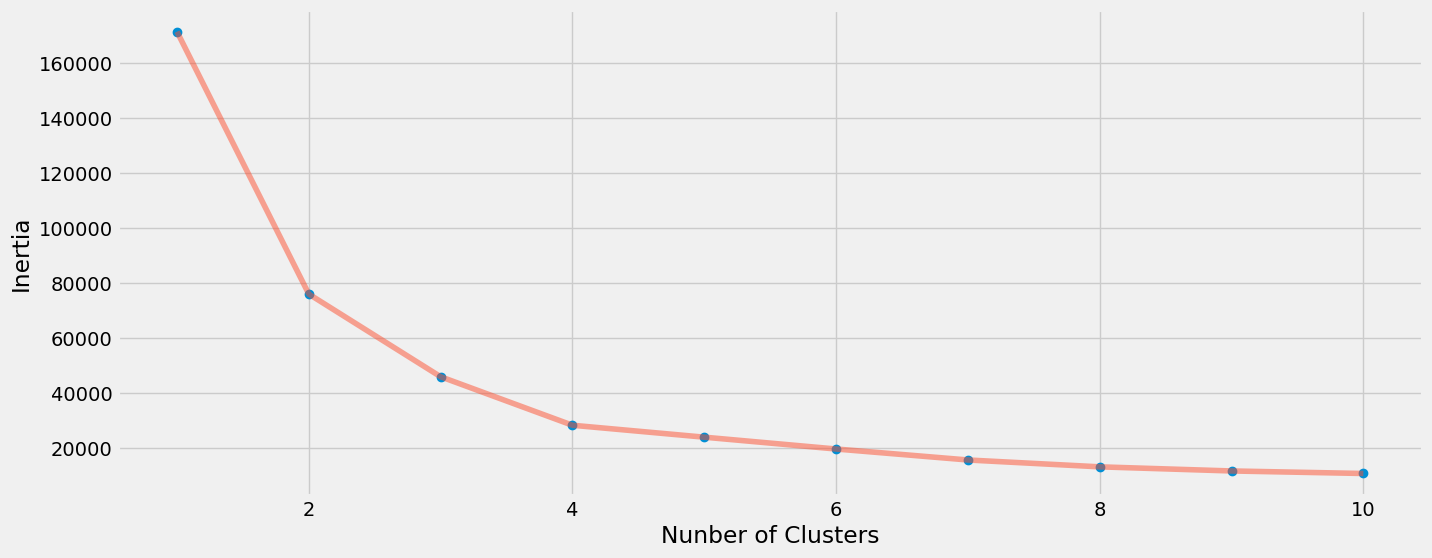

In [29]:
plt.figure(1, figsize= (15,6))
plt.plot(np.arange(1, 11), inertia,'o')
plt.plot(np.arange(1, 11), inertia,'-', alpha = 0.5)
plt.xlabel('Nunber of Clusters'), plt.ylabel('Inertia')
plt.show()

In [31]:
algorithm =KMeans(n_clusters = 4,init='k-means++',n_init =10,max_iter=300,  tol=0.0001, random_state= 111, algorithm ='elkan')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1= algorithm.cluster_centers_

In [33]:
h=0.02
x_min, x_max =X1[:,0].min() -1,X1[:,0].max()+1
y_min, y_max =X1[:,1].min() -1,X1[:,1].max()+1
xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])

Text(0.5, 0, 'Age')

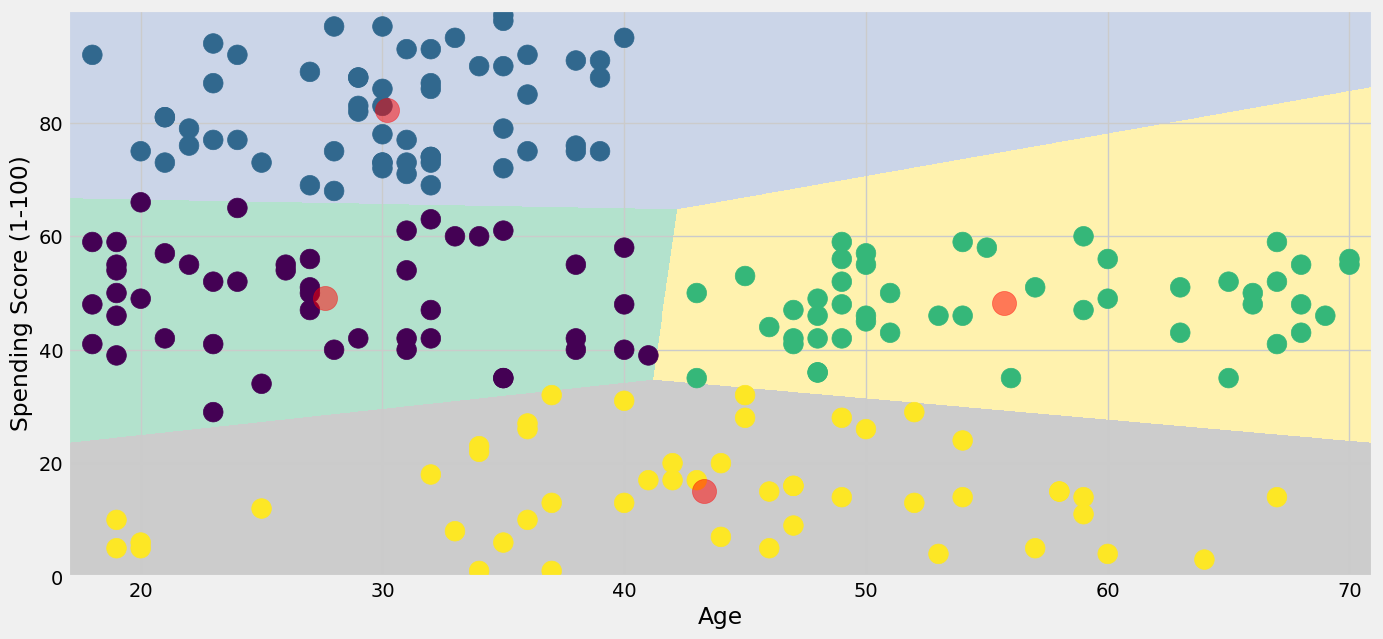

In [35]:
import numpy as np

# Define the range for your grid
x_min, x_max = dataset['Age'].min() - 1, dataset['Age'].max() + 1
y_min, y_max = dataset['Spending Score (1-100)'].min() - 1, dataset['Spending Score (1-100)'].max() + 1

# Create a mesh grid
xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Then your code continues
plt.figure(1, figsize=(15, 7))
plt.clf()

# Reshape z if already defined (e.g., a prediction grid)
z = z.reshape(xx.shape)

plt.imshow(z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Age', y='Spending Score (1-100)', data=dataset, c=labels1, s=200)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')

In [37]:
X2=dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia =[]
for n in range(1, 11):
    algorithm =KMeans(n_clusters = n,init='k-means++',n_init =10,max_iter=300,  tol=0.0001, random_state= 111, algorithm ='elkan')
    algorithm.fit(X2)
    inertia.append(algorithm. inertia_)

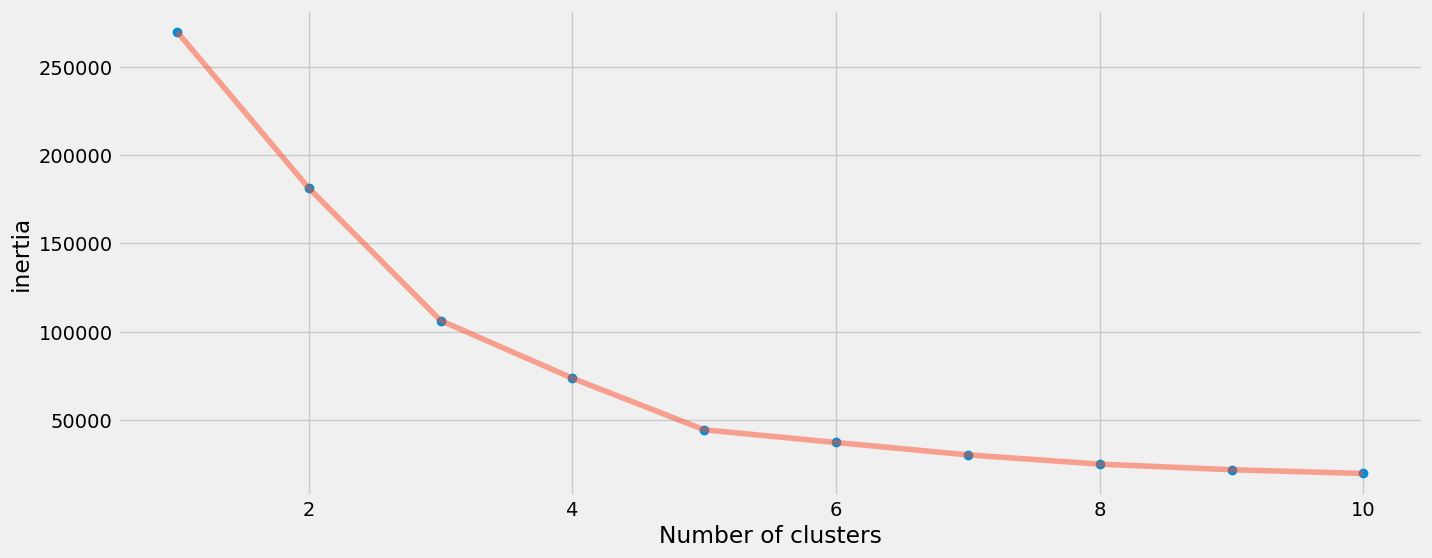

In [39]:
plt.figure(1,figsize =(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha = 0.5)
plt.xlabel('Number of clusters'),plt.ylabel('inertia')
plt.show()


In [41]:
algorithm =KMeans(n_clusters=5,init ='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan')
algorithm.fit(X2)
labels2=algorithm.labels_
centroids2=algorithm.cluster_centers_


In [43]:
h=0.02
x_min,x_max =X2[:,0].min()-1,X2[:,0].max()+1
y_min,y_max =X2[:,1].min()-1,X2[:,1].max()+1
xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z2=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])


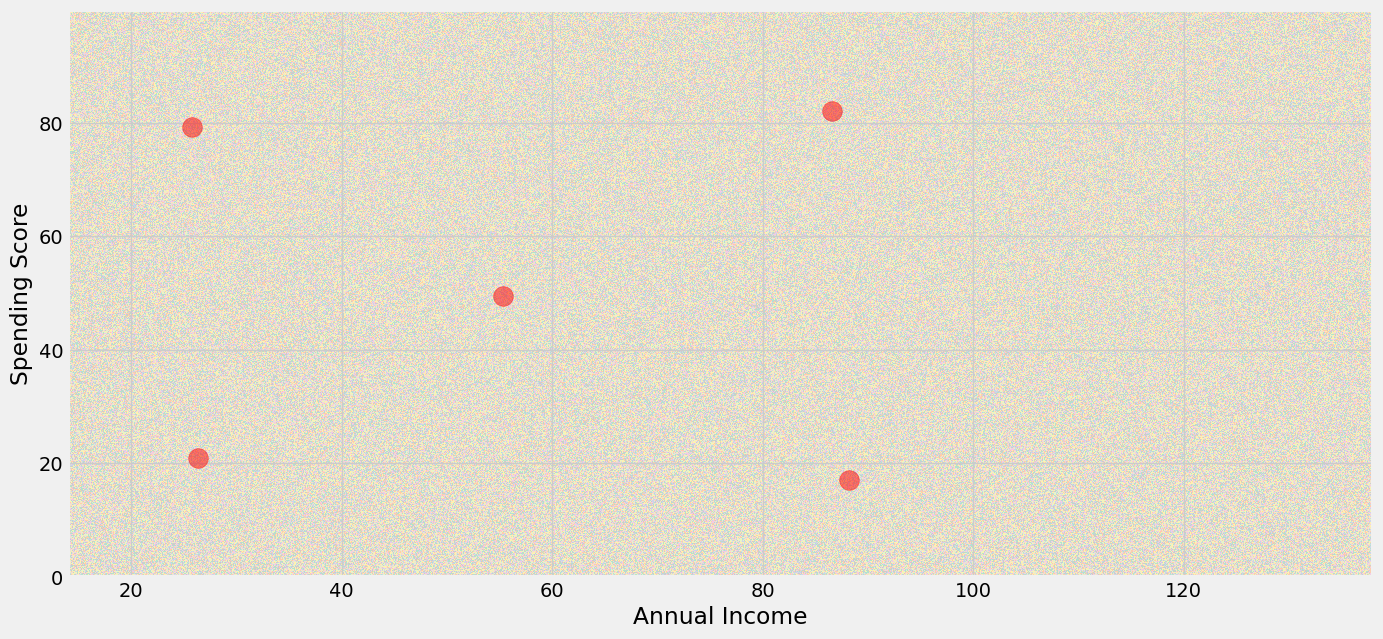

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Example grid creation

xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Example prediction data (ensure it matches the grid size)
z2 = np.random.rand(xx.size)  # Simulating predictions
z2 = z2.reshape(xx.shape)     # Reshape to match grid shape

# Visualization
plt.figure(figsize=(15, 7))
plt.clf()
plt.imshow(z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(centroids2[:,0],centroids2 [:,1], c='red', s=200, alpha=0.5)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [63]:

from sklearn.cluster import KMeans

# Select features used for clustering
X = dataset[['Age', 'Spending Score (1-100)']]

# Fit the KMeans model (you can replace 5 with the number of clusters you want)
model = KMeans(n_clusters=5, random_state=42)
labels2 = model.fit_predict(X)
centroids2 = model.cluster_centers_


In [65]:
from sklearn.cluster import KMeans

# Clustering input features
X = dataset[['Age', 'Spending Score (1-100)']]

# Train the model
model = KMeans(n_clusters=5, random_state=42)
labels2 = model.fit_predict(X)
centroids2 = model.cluster_centers_


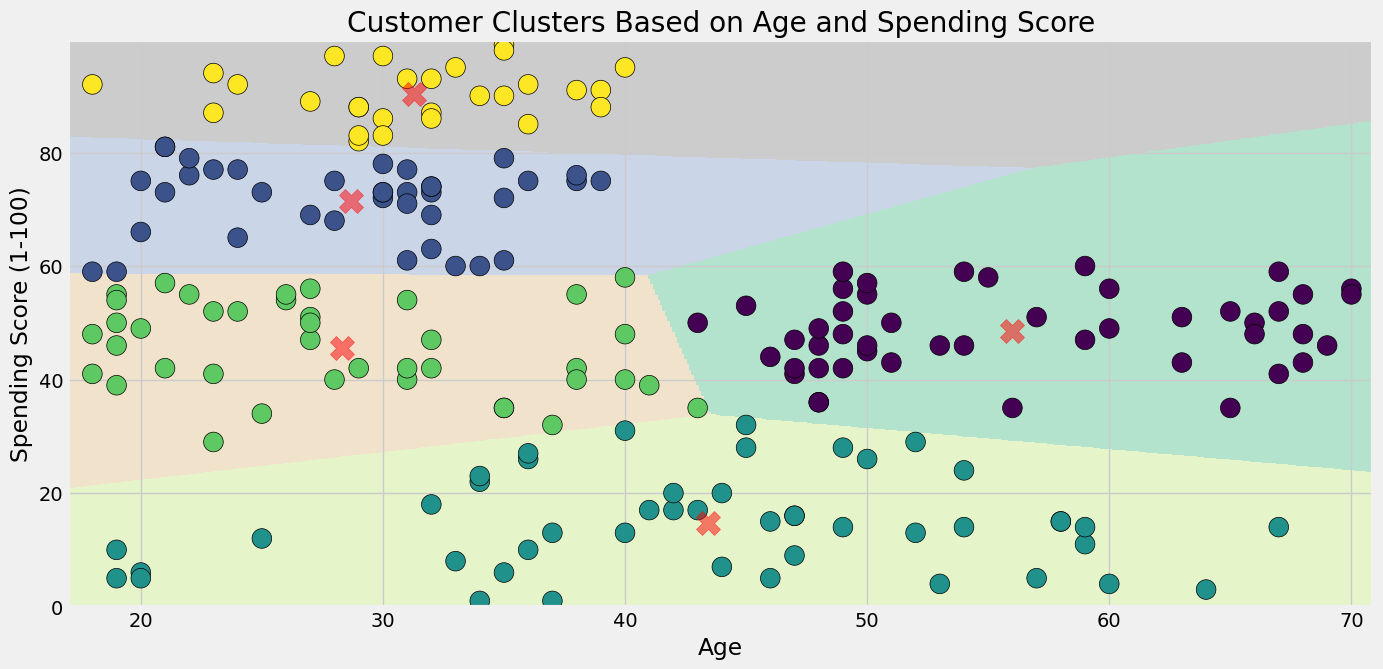

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Step size for the mesh
h = 0.1

# Use the same features for mesh grid and prediction
x_min, x_max = dataset['Age'].min() - 1, dataset['Age'].max() + 1
y_min, y_max = dataset['Spending Score (1-100)'].min() - 1, dataset['Spending Score (1-100)'].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create grid input for prediction
grid_points = np.c_[xx.ravel(), yy.ravel()]  # shape (num_points, 2)

# Predict cluster labels using your model (e.g., KMeans)
z2 = model.predict(grid_points)
z2 = z2.reshape(xx.shape)  # Reshape to match the mesh grid shape

# Plotting
plt.figure(figsize=(15, 7))
plt.clf()

# Show decision boundaries
plt.imshow(z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# Scatter actual data points using Age and Spending Score
plt.scatter(x=dataset['Age'], y=dataset['Spending Score (1-100)'],
            c=labels2, s=200, edgecolor='k')

# Scatter centroids (make sure they match Age vs Spending Score)
plt.scatter(x=centroids2[:, 0], y=centroids2[:, 1],
            s=300, c='red', alpha=0.5, marker='X')

# Labels
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters Based on Age and Spending Score')
plt.show()


In [69]:
X3=dataset[[ 'Age' ,'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia =[]
for n in range(1, 11):
    algorithm =KMeans(n_clusters = n,init='k-means++',n_init =10,max_iter=300,  tol=0.0001, random_state= 111, algorithm ='elkan')
    algorithm.fit(X3)
    inertia.append(algorithm. inertia_)

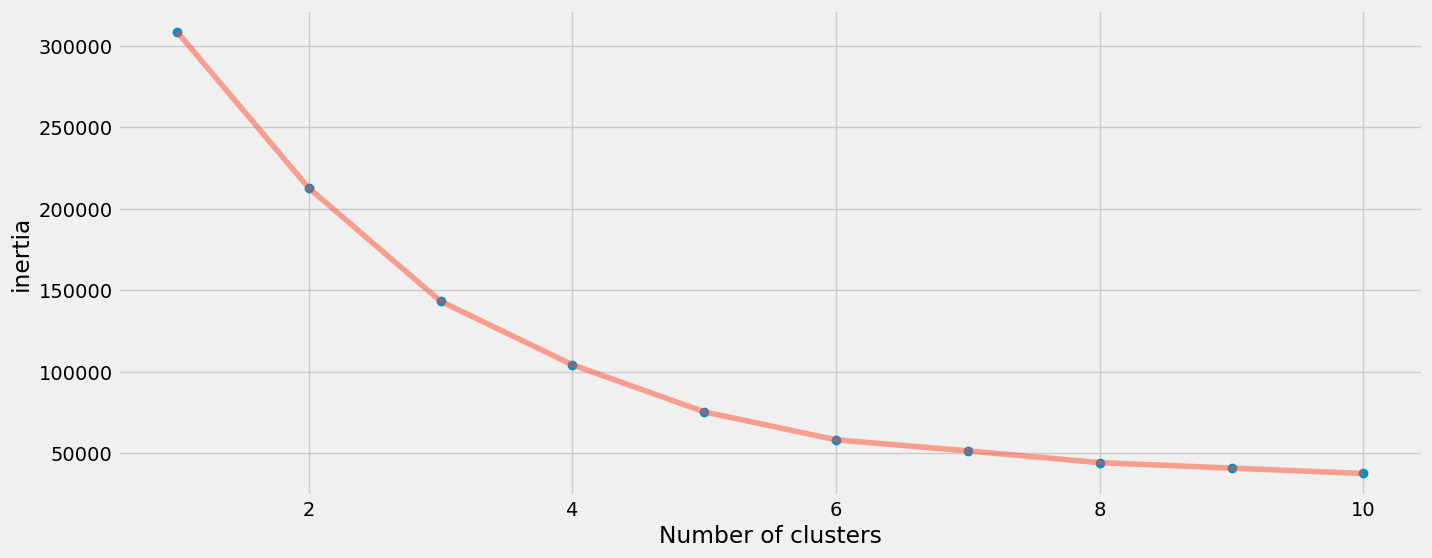

In [71]:
plt.figure(1,figsize =(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha = 0.5)
plt.xlabel('Number of clusters'),plt.ylabel('inertia')
plt.show()


In [73]:
algorithm =KMeans(n_clusters=6,init ='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan')
algorithm.fit(X3)
labels3=algorithm.labels_
centroids3=algorithm.cluster_centers_


In [80]:
pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [88]:

import plotly.graph_objects as go
dataset['label3']=labels3
trace1 = go.Scatter3d(
    x=dataset['Age'],
    y=dataset['Spending Score (1-100)'],
    z=dataset['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=dataset['label3'],
        size=20,
        line=dict(
            color=dataset['label3'],
            width=12
        ),
        opacity=0.8
    )
)
data=[trace1]
layout=go.Layout(
    #    margin=dict(
    #        1=0,
    #        r=0,
    #        b=0,
    #        t=0
    #     )
    title= 'clusters',
    scene=dict(
        xaxis =dict(title='Age'),
        yaxis =dict(title='Spending Score (1-100)'),
             zaxis =dict(title='Annual Income')
        )
    )
fig=go.Figure(data=data,layout=layout)
py.offline.iplot(fig)
                

In [82]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4
5,6,Female,22,17,76,5
6,7,Female,35,18,6,4
7,8,Female,23,18,94,5
8,9,Male,64,19,3,4
9,10,Female,30,19,72,5


In [90]:
X = dataset.iloc[:,  [3,4]].values

In [92]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans =KMeans(n_clusters =i,init ='k-means++',random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

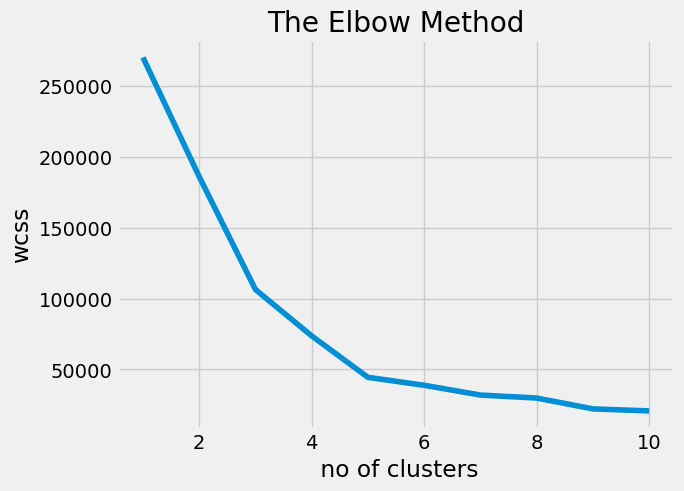

In [94]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel(' no of clusters')
plt.ylabel('wcss')
plt.show()

In [96]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++',random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

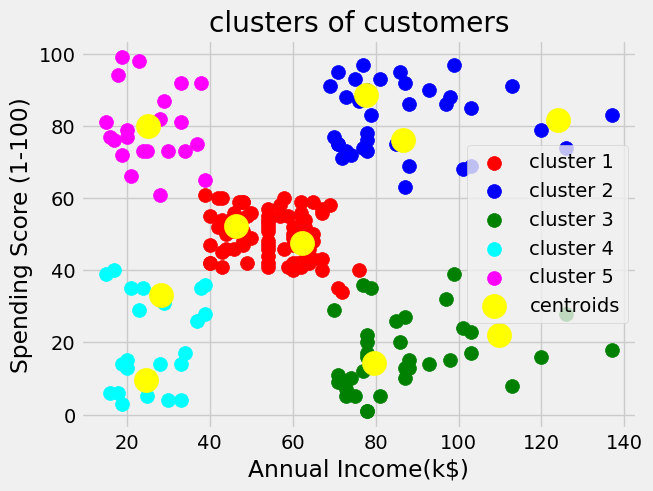

In [98]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100,c='red',label='cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100,c='green',label='cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100,c='cyan',label='cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100,c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()